In [1]:
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv"
url_1="https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv"




In [2]:
train_data = pd.read_csv(url)
test_data = pd.read_csv(url_1)
train_data .to_csv("Big_Mart_train.csv",sep='\t')
test_data .to_csv("Big_Mart_test.csv",sep='\t')

In [3]:
train_data 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


we are keeping train data as separate for training pupose

In [4]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Here Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Establishment_Year are categorical(ordinal) data type columns and Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type are categorical(nominal) data type columns and all other columns are conitunous data type including target column.so This is Regression problem

In [5]:
train_data.shape

(8523, 12)

In [6]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [7]:
test_data.shape

(5681, 11)

we are keeping test data as separate for testing pupose

In [8]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

train dataset has 8523 rows and 12 features and test has 5681 rows and 11 columns. train has 1 extra column which is the target variable. We will predict this target variable for the test dataset now.Item_Outlet_Sales is present in train but not in test dataset because this is the target variable that we have to predict. 

In [9]:
#checks nulls values of columns if present any
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
#replacing null values with simpleimputer using mean and mode of columns
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy="mean")
train_data['Item_Weight']=imp.fit_transform(train_data['Item_Weight'].values.reshape(-1,1))
test_data['Item_Weight']=imp.fit_transform(test_data['Item_Weight'].values.reshape(-1,1))


In [13]:
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
train_data['Outlet_Size']=imp.fit_transform(train_data['Outlet_Size'].values.reshape(-1,1))
test_data['Outlet_Size']=imp.fit_transform(test_data['Outlet_Size'].values.reshape(-1,1))


In [14]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

columns has no null values now

In [16]:
train_data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Item_Fat_Content column has same values in different name.so we are correcting with replace

In [17]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [19]:
# combining Item_Fat_Content misspelled
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [20]:
# creating new column num_years
train_data['num_years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test_data['num_years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 

we created new column depicting the years of operation of a store.This shows stores which are 4-28 years old.

In [21]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [22]:
Store_types=train_data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')
Store_types

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


this shows store type and their total sales

In [23]:
Item_types=train_data.pivot_table(values='Item_Outlet_Sales',index='Item_Type')
Item_types

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


this shows product and their total sales

In [24]:
train_data['Item_Type'].value_counts() 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

this shows how many products are there in each category

In [25]:
train_data.groupby(['Outlet_Type'])['Item_Type'].count()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Item_Type, dtype: int64

this shows how many items are there in each store

In [26]:
d=train_data.groupby(['Outlet_Type'])['Item_Type'].value_counts()
d



Outlet_Type        Item_Type            
Grocery Store      Fruits and Vegetables    152
                   Snack Foods              146
                   Household                119
                   Frozen Foods             103
                   Dairy                     92
                                           ... 
Supermarket Type3  Hard Drinks               23
                   Others                    15
                   Starchy Foods             14
                   Breakfast                 11
                   Seafood                    7
Name: Item_Type, Length: 64, dtype: int64

this shows in each category of store ,what are the category of products and its respective counts

In [27]:
s=train_data.groupby(['Item_Type'])['Item_Fat_Content'].value_counts()
s

Item_Type              Item_Fat_Content
Baking Goods           Low Fat             329
                       Regular             319
Breads                 Low Fat             140
                       Regular             111
Breakfast              Regular              69
                       Low Fat              41
Canned                 Low Fat             341
                       Regular             308
Dairy                  Low Fat             418
                       Regular             264
Frozen Foods           Low Fat             450
                       Regular             406
Fruits and Vegetables  Low Fat             630
                       Regular             602
Hard Drinks            Low Fat             214
Health and Hygiene     Low Fat             520
Household              Low Fat             910
Meat                   Regular             255
                       Low Fat             170
Others                 Low Fat             169
Seafood             

this seggregates each products and their repective fat content and seggregate 

In [28]:
p=train_data.groupby(['Item_Type'])['Item_Outlet_Sales'].value_counts()
p

Item_Type      Item_Outlet_Sales
Baking Goods   539.2980             5
               1518.0240            5
               1211.7560            4
               126.5020             3
               392.8220             3
                                   ..
Starchy Foods  6478.2340            1
               6757.8700            1
               7033.5112            1
               7443.6440            1
               8132.0812            1
Name: Item_Outlet_Sales, Length: 7123, dtype: int64

this shows sales of each category of product

(-1.1029724335776085,
 1.1077538028038083,
 -1.1020524241970493,
 1.1086738121843676)

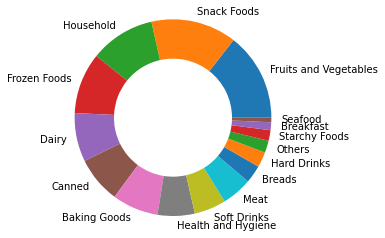

In [29]:
sorted_counts=train_data['Item_Type'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

this shows what are all ctegories of products and shows which product's number is high.we can see that snacks food and fruits and vegetables are selling the most whereas other seafood,starchy food and other households are less in number

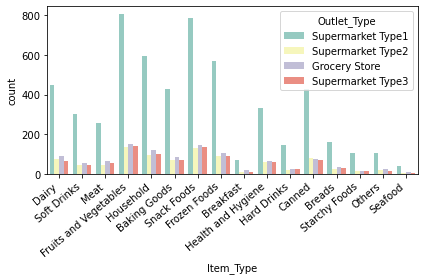

In [30]:
ax = sns.countplot(x="Item_Type", hue="Outlet_Type", data=train_data,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

this shows store types and each of its products counts.we can oberve supermarket type 1 has most no of products for sale.

In [31]:
minvalue = train_data['Item_Visibility'].min()
  
minvalue

0.0

In [32]:
meanvalue = train_data['Item_Visibility'].mean()
  
meanvalue

0.06613202877895127

In [33]:
meanvalue = test_data['Item_Visibility'].mean()
  
meanvalue

0.06568385968808292

replace Item_Visibility column's 0.0 values to its mean value.becoz item visibility cant be 0 in number.it should have some minimum visibility number

In [34]:
imp=SimpleImputer(missing_values=0.0,strategy="mean")
train_data['Item_Visibility']=imp.fit_transform(train_data['Item_Visibility'].values.reshape(-1,1))
test_data['Item_Visibility']=imp.fit_transform(test_data['Item_Visibility'].values.reshape(-1,1))

In [35]:
#Get the first two characters of ID:
train_data['Item_Type_Combined'] = train_data['Item_Identifier'].apply(lambda x: x[0:2])
##Rename them to more intuitive categories:
train_data['Item_Type_Combined'] = train_data['Item_Type_Combined'].map({'FD':'Food',
                                                                        'NC':'Non-Consumable',
                                                                         'DR':'Drinks'})
train_data['Item_Type_Combined']       
train_data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

we can observe how many consumable  ,non consumable and drinks are in total in all stores

In [36]:
#Get the first two characters of ID:
test_data['Item_Type_Combined'] = test_data['Item_Identifier'].apply(lambda x: x[0:2])
##Rename them to more intuitive categories:
test_data['Item_Type_Combined'] = test_data['Item_Type_Combined'].map({'FD':'Food',
                                                                        'NC':'Non-Consumable',
                                                                         'DR':'Drinks'})
test_data['Item_Type_Combined']       
test_data['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

we can observe how many food,non-consumable and drinks are there in total in all stores

In [37]:
#Mark non-consumables as separate category in low_fat:
train_data.loc[train_data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train_data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In  Item_Fat_Content column ,the values for other household has mistakely has values as regular fat or low fat.since if it has value of non cosumables we cant have its type as low fat or regular fat.so replace it with 'non-edible' type in train data

In [38]:
#Mark non-consumables as separate category in low_fat:
test_data.loc[test_data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
test_data['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

since test data is going for testing,In  Item_Fat_Content column ,the values for other household has mistakely has values as regular fat or low fat.since if it has value of non cosumables we cant have its type as low fat or regular fat.so replace it with 'non-edible' type in test data too

In [39]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,num_years,Item_Type_Combined
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,FDX07,19.200,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15,Food
4,NCD19,8.930,Non-Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,26,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,11,Food
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,9,Non-Consumable
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,4,Food


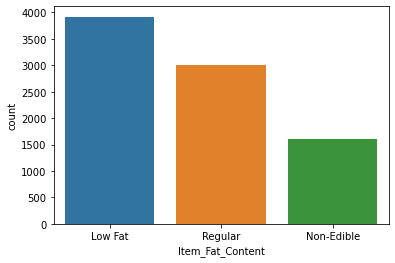

In [40]:
ax = sns.countplot(x="Item_Fat_Content", data=train_data)

the products  with low fat are high in number

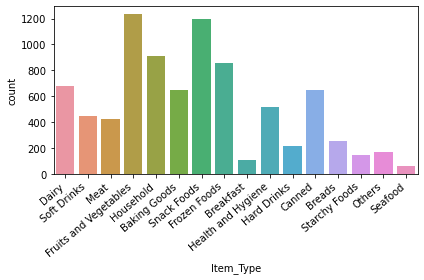

In [41]:
ax = sns.countplot(x="Item_Type", data=train_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

snacks food,fruits and vegetables,household,frozen foods are high in number for sales than others

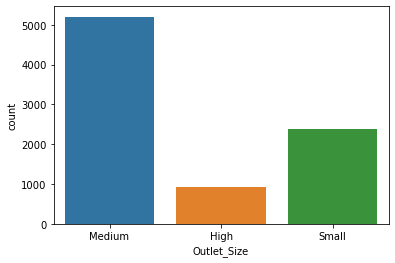

In [42]:
ax = sns.countplot(x="Outlet_Size", data=train_data)

the medium size shops are high in number in all the stores

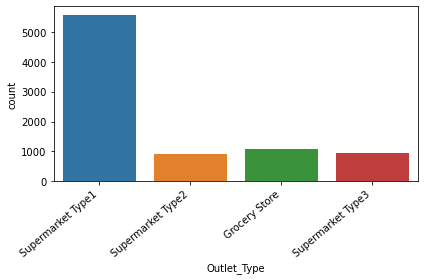

In [43]:
ax = sns.countplot(x="Outlet_Type", data=train_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

supermarket type 1 is mostly high in number in all the cities mentioned as tier1,2,3

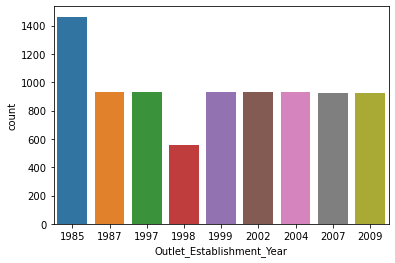

In [44]:
ax = sns.countplot(x="Outlet_Establishment_Year", data=train_data)

products were high in 1985 as compared to 2009

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

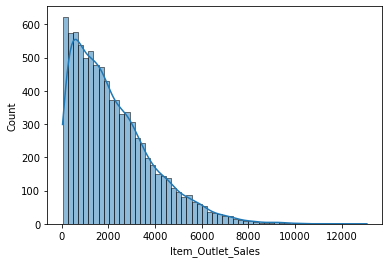

In [45]:
sns.histplot(data=train_data, x="Item_Outlet_Sales", kde=True)

the distribution is right skewed.it shows most sales happened around in range upto 3000rs

<AxesSubplot:xlabel='num_years', ylabel='Item_Outlet_Sales'>

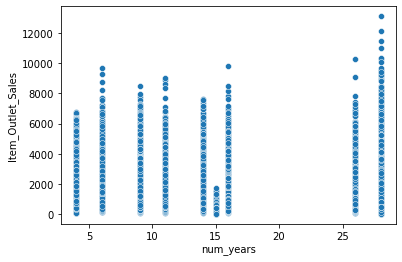

In [46]:
sns.scatterplot(x="num_years",y="Item_Outlet_Sales",data=train_data)

sales increases when number of years increases

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

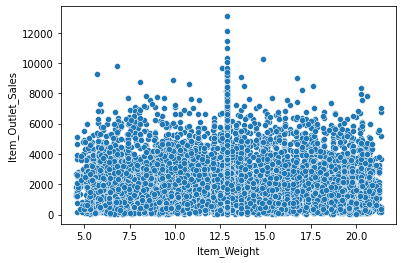

In [47]:
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",data=train_data)

this shows item weight has not has much impact on sales  mostly

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

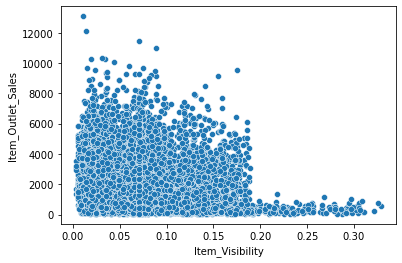

In [48]:
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",data=train_data)

if item visibility is in the range of 0.0011 to 0.19 then sales is in increase.but if item visibilty increases beyond 0.10 then sales will decrease

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

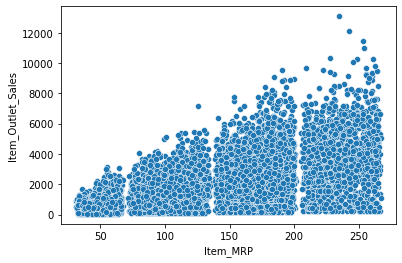

In [49]:
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",data=train_data)

if item mrp increases then total sales will also get increased

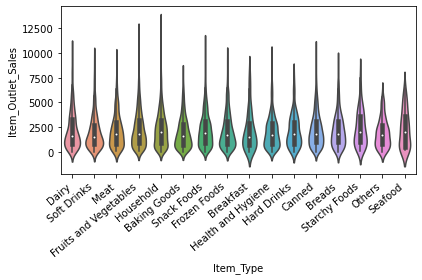

In [50]:
ax = sns.violinplot(x="Item_Type", y="Item_Outlet_Sales", data=train_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

this shows all products sales happened were in range of 100 to 2500 only 

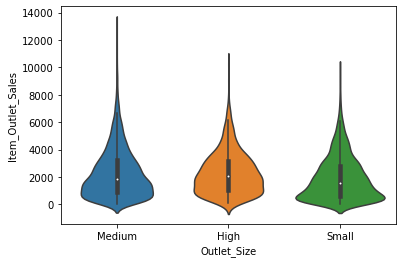

In [51]:
ax = sns.violinplot(x="Outlet_Size", y="Item_Outlet_Sales", data=train_data)

this shows that the stores has sales high in number in range of 200 to 4000

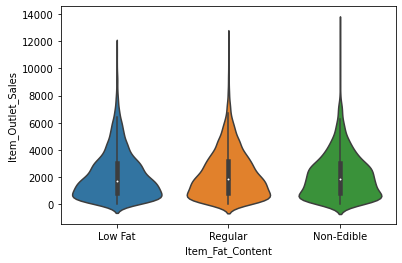

In [52]:
ax = sns.violinplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=train_data)

this shows that the products has sales high in range of 100 to  3000

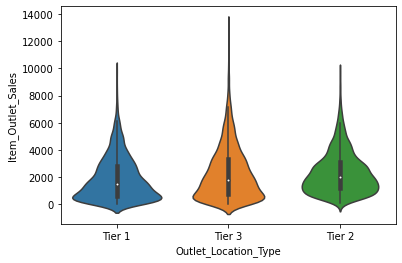

In [53]:
ax = sns.violinplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=train_data)

this shows all stores has sales high in range of 100 to 3000

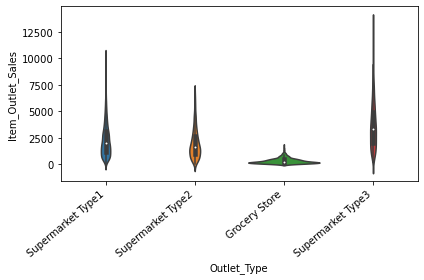

In [54]:
ax = sns.violinplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

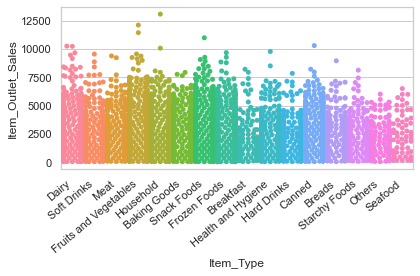

In [55]:
ax=sns.set(style="whitegrid")
ax=sns.swarmplot(x="Item_Type", y="Item_Outlet_Sales", data=train_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


this shows high sales happened in fruits and vegetables,snack foods,household and frozen foods.least sale happened in seafood

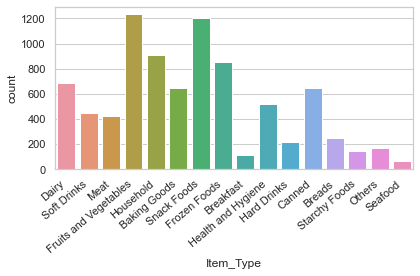

In [56]:
ax = sns.countplot(x="Item_Type", data=train_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


fruits and vegetables and snack food are selling high and high in number

In [57]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined']
for val in list1:
    train_data[val]=le.fit_transform(train_data[val].astype(str))
train_data   

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,num_years,Item_Type_Combined
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,14,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,4,0
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,14,1
3,1121,19.200,2,0.070482,6,182.0950,0,1998,1,2,0,732.3800,15,1
4,1297,8.930,1,0.070482,9,53.8614,1,1987,0,2,1,994.7052,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,26,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850,11,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,9,2
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,4,1


In [58]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined']
for val in list1:
    test_data[val]=le.fit_transform(test_data[val].astype(str))
test_data   

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Type_Combined
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1,14,1
1,1067,8.300000,2,0.038428,4,87.3198,2,2007,1,1,1,6,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0,15,2
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1,6,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1,16,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2,4,1
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1,11,2
5679,517,15.300000,2,0.070036,3,214.6218,2,2007,1,1,1,6,1


<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

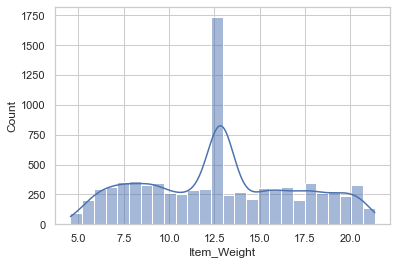

In [59]:
sns.histplot(data=train_data, x="Item_Weight", kde=True)

item weight has not has much impact on sales

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

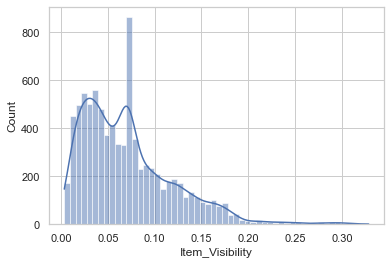

In [60]:
sns.histplot(data=train_data, x="Item_Visibility", kde=True)

if item visibility number increases sales will decrease.it should be ranked in prior only always

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

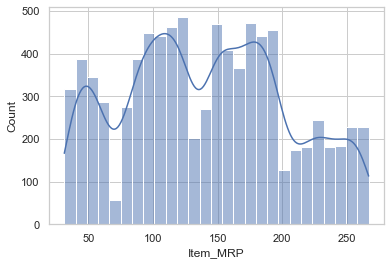

In [61]:
sns.histplot(data=train_data, x="Item_MRP", kde=True)

items with maximum mrp are in range of 100 to 200

In [62]:
v=train_data[list(train_data.columns)[11]] 
train_data=train_data.drop(['Item_Outlet_Sales'],axis=1) 
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Type_Combined
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,14,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,4,0
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,14,1
3,1121,19.200,2,0.070482,6,182.0950,0,1998,1,2,0,15,1
4,1297,8.930,1,0.070482,9,53.8614,1,1987,0,2,1,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,26,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,11,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,9,2
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,4,1


In [63]:
train_data.insert(13,'Item_Outlet_Sales',v) 
train_data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Type_Combined,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,14,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,4,0,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,14,1,2097.2700
3,1121,19.200,2,0.070482,6,182.0950,0,1998,1,2,0,15,1,732.3800
4,1297,8.930,1,0.070482,9,53.8614,1,1987,0,2,1,26,2,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,26,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,11,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,9,2,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,4,1,1845.5976


In [64]:
#find correlation co.efficient of all variables in table
train_data.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Type_Combined,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,0.171849,-0.029341,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.012772,0.787480,0.002869
Item_Weight,0.044518,1.000000,-0.002151,-0.017763,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.008301,0.063232,0.011550
Item_Fat_Content,0.171849,-0.002151,1.000000,0.022684,-0.066248,0.008594,-0.003433,0.001451,-0.001791,0.000958,0.000084,-0.001451,0.186485,0.015249
Item_Visibility,-0.029341,-0.017763,0.022684,1.000000,-0.035922,-0.005515,-0.106405,-0.078316,0.072297,-0.027742,-0.179380,0.078316,-0.046730,-0.134035
Item_Type,-0.017973,0.028015,-0.066248,-0.035922,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,-0.004970,0.007456,0.017048
Item_MRP,0.012853,0.024756,0.008594,-0.005515,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,-0.005020,0.032517,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.003433,-0.106405,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,-0.079035,-0.009730,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.001451,-0.078316,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-1.000000,-0.008551,-0.049135
Outlet_Size,0.001389,-0.007225,-0.001791,0.072297,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.193389,-0.000624,-0.086182
Outlet_Location_Type,0.003656,0.004088,0.000958,-0.027742,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089216,0.007661,0.089367


item mrp and outlet type are most positively correlated with target sales.if outlet type is supermarket type 1 then sales will increase.if item mrp increases then total sales value happened will increase

item visibility,establishment year,outlet size are negatively correlated with the target column sales

<AxesSubplot:>

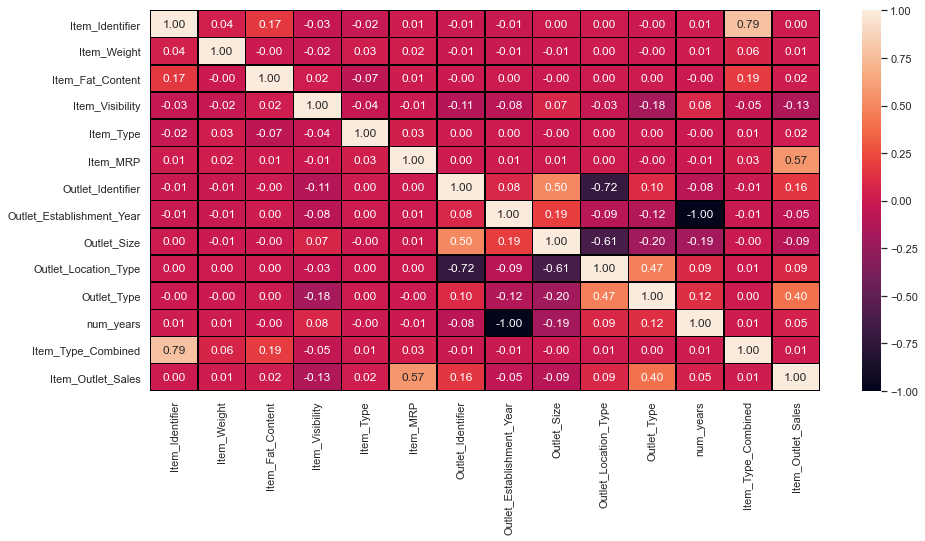

In [65]:
plt.figure(figsize=(15,7))
sns.heatmap(train_data.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

establishment year has no much impact on the target column.most of the other columns are in good correlation with target sales.we can compute number of years instead

In [66]:
train_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Type_Combined,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.892995,0.070482,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,15.168133,1.093864,2181.288914
std,449.222377,4.226124,0.895005,0.048730,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,8.371760,0.522090,1706.499616
min,0.000000,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,4.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.033085,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,9.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.062517,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,26.000000,1.000000,3101.296400
max,1558.000000,21.350000,2.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,28.000000,2.000000,13086.964800


item visibility has mean and std dev close to 0 hence it has some skewness and outliers.

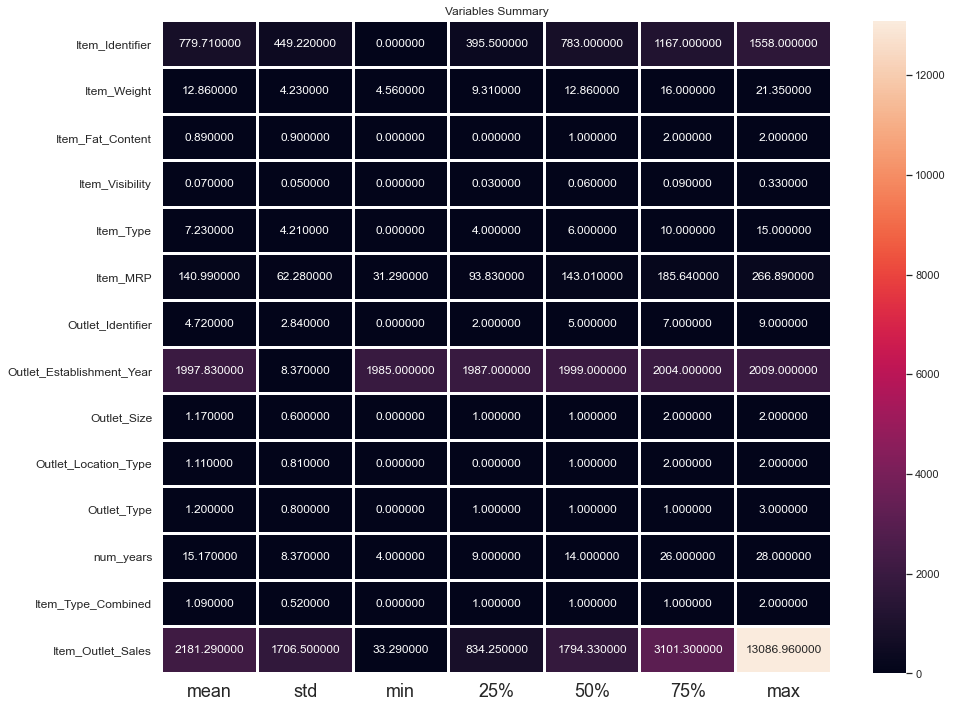

In [67]:
plt.figure(figsize=(15,12))
sns.heatmap(round(train_data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

item visibilty has skewness and outliers.

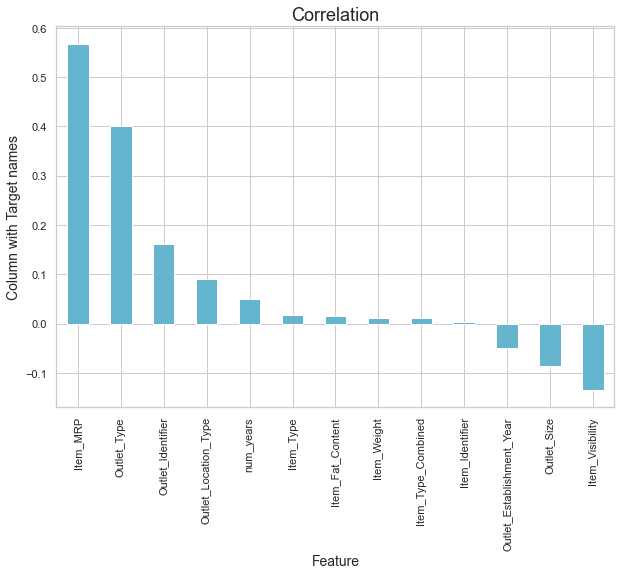

In [68]:
plt.figure(figsize=(10,7))
train_data.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [69]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
train_data.shape


(8523, 14)

In [71]:
train_data.shape[1]


14

In [72]:
#calculates vif
def calc_vif(train_data):
    vif=pd.DataFrame()
    vif['Variables']=train_data.columns
    vif['VIF FACTOR']=[variance_inflation_factor(train_data.values,i)for i in range(train_data.shape[1])]
    return(vif)


calc_vif(train_data)

,Variables,VIF FACTOR
0,Item_Identifier,2.642131
1,Item_Weight,1.005842
2,Item_Fat_Content,1.044090
3,Item_Visibility,1.075765
4,Item_Type,1.008954
5,Item_MRP,1.664407
6,Outlet_Identifier,4.171401
7,Outlet_Establishment_Year,63.471427
8,Outlet_Size,1.745998
9,Outlet_Location_Type,5.888197


since establishment year has high VIF we can drop this column

In [73]:
#drop column not needed
train_data1=train_data.drop(['Outlet_Establishment_Year'],axis=1)
test_data=test_data.drop(['Outlet_Establishment_Year'],axis=1)
train_data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Type_Combined,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1,0,1,14,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,1,2,2,4,0,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1,0,1,14,1,2097.2700
3,1121,19.200,2,0.070482,6,182.0950,0,1,2,0,15,1,732.3800
4,1297,8.930,1,0.070482,9,53.8614,1,0,2,1,26,2,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,0,2,1,26,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,1,1,1,11,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2,1,1,9,2,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,1,2,2,4,1,1845.5976


In [74]:
calc_vif(train_data1)

,Variables,VIF FACTOR
0,Item_Identifier,10.594215
1,Item_Weight,8.980996
2,Item_Fat_Content,2.065465
3,Item_Visibility,3.203426
4,Item_Type,3.815062
5,Item_MRP,9.638971
6,Outlet_Identifier,10.498589
7,Outlet_Size,6.880761
8,Outlet_Location_Type,9.713440
9,Outlet_Type,8.887867


all columns are having correct VIF range now.

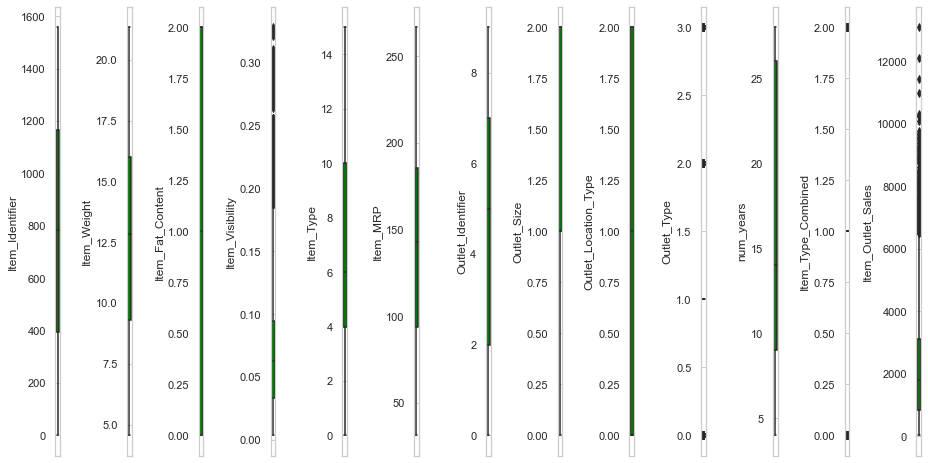

In [75]:
collist=train_data1.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=train_data1[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [76]:
#ckeck skewness
train_data1.skew()

Item_Identifier        -0.008877
Item_Weight             0.090561
Item_Fat_Content        0.211160
Item_Visibility         1.271273
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Identifier      -0.059861
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
num_years               0.396641
Item_Type_Combined      0.114510
Item_Outlet_Sales       1.177531
dtype: float64

#checking Z-score to remove outliers

In [77]:

import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(train_data1))
z.shape


(8523, 13)

In [78]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  847,  854,
        935,  991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324,
       1434, 1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827,
       1841, 1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324,
       2439, 2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017,
       3083, 3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474,
       3488, 3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993,
       4006, 4219, 4289, 4346, 4349, 4382, 4408, 4530, 4538, 4656, 4674,
       4676, 4681, 4772, 4789, 4888, 4941, 4961, 4987, 4991, 5031, 5065,
       5150, 5177, 5185, 5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732,
       5734, 5752, 5795, 5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000,
       6008, 6012, 6134, 6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606,
       6622, 6674, 6786, 6886, 6903, 6993, 7005, 7

In [79]:
train_new=train_data1[(z<3).all(axis=1)]
print(train_data1.shape)
print(train_new.shape)

(8523, 13)
(8335, 13)


some outliers got removed

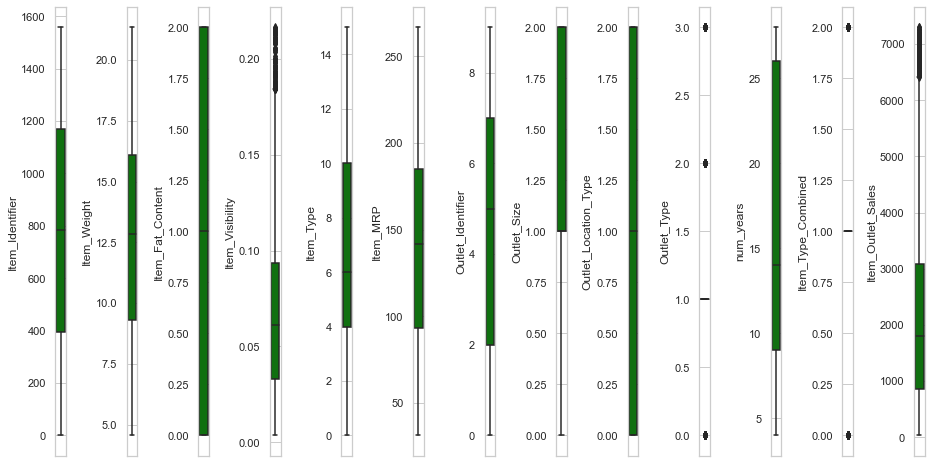

In [80]:
#checking outliers
collist=train_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=train_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

the column item visibility has less outliers and skewness now

In [81]:
#finds data loss
loss_percent=(8523-8335)/(8523*100)
print(loss_percent)

0.00022057960811920686


data loss percentage is very low.data is cleaned also

In [82]:
train_new


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Type_Combined,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1,0,1,14,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,1,2,2,4,0,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1,0,1,14,1,2097.2700
3,1121,19.200,2,0.070482,6,182.0950,0,1,2,0,15,1,732.3800
4,1297,8.930,1,0.070482,9,53.8614,1,0,2,1,26,2,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,0,2,1,26,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,1,1,1,11,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2,1,1,9,2,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,1,2,2,4,1,1845.5976


In [83]:
train_new.shape

(8335, 13)

In [84]:
y=train_new['Item_Outlet_Sales'].mean()
y

2135.0343197840534

In [85]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Type_Combined
0,1103,20.750000,0,0.007565,13,107.8622,9,1,0,1,14,1
1,1067,8.300000,2,0.038428,4,87.3198,2,1,1,1,6,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1,2,0,15,2
3,809,7.315000,0,0.015388,13,155.0340,2,1,1,1,6,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1,2,3,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,2,0,1,16,1
5677,306,7.600000,2,0.142991,15,169.1448,3,1,2,2,4,1
5678,1412,10.000000,1,0.073529,8,118.7440,7,1,1,1,11,2
5679,517,15.300000,2,0.070036,3,214.6218,2,1,1,1,6,1


In [86]:
#seggregate input data and output data
x=train_new.iloc[:,:-1]
y=train_new.iloc[:,-1]

In [87]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.45945489, -0.81694419, -1.04496934, ..., -0.13537666,
         0.07612322, -0.1744713 ],
       [-2.09360648, -1.72449936,  1.1585581 , ...,  1.05671325,
        -1.64432913, -2.12227759],
       [-0.1539454 ,  1.07917525, -1.04496934, ..., -0.13537666,
         0.07612322, -0.1744713 ],
       ...,
       [ 1.20216671, -0.49260734,  0.37710247, ..., -0.13537666,
        -0.62002288,  1.71119364],
       [-0.11257945, -1.3653269 ,  1.1585581 , ...,  1.05671325,
        -1.64432913, -0.1744713 ],
       [-1.86136664,  0.48925237, -1.04496934, ..., -0.13537666,
         0.30716601, -2.12227759]])

In [88]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
test_data=power_transform(test_data,method='yeo-johnson')
test_data

array([[ 0.75746742,  1.7700739 , -1.05238222, ..., -0.12353311,
         0.05094798, -0.18282546],
       [ 0.68861828, -1.03619283,  1.15385799, ..., -0.12353311,
        -1.18564047, -0.18282546],
       [ 1.31359527,  0.49167514,  0.36198932, ..., -1.91575348,
         0.16899032,  1.70670066],
       ...,
       [ 1.32423381, -0.59355557,  0.36198932, ..., -0.12353311,
        -0.34030129,  1.70670066],
       [-0.47261831,  0.64562931,  1.15385799, ..., -0.12353311,
        -1.18564047, -0.18282546],
       [ 0.53315531, -0.72091914,  1.15385799, ..., -0.12353311,
        -0.34030129, -0.18282546]])

In [89]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.19063595, 0.3271025 , 0.        , ..., 0.46740861, 0.56747088,
        0.5081051 ],
       [0.02022796, 0.10050259, 1.        , ..., 0.770486  , 0.        ,
        0.        ],
       [0.54144991, 0.8005288 , 0.        , ..., 0.46740861, 0.56747088,
        0.5081051 ],
       ...,
       [0.90586172, 0.40808347, 0.64536152, ..., 0.46740861, 0.33785531,
        1.        ],
       [0.55256569, 0.19018138, 1.        , ..., 0.770486  , 0.        ,
        0.5081051 ],
       [0.082635  , 0.65323586, 0.        , ..., 0.46740861, 0.64367762,
        0.        ]])

In [90]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
test_data= mmscaler.fit_transform(test_data)
test_data

array([[0.78722426, 0.97093106, 0.        , ..., 0.4669643 , 0.56323878,
        0.50915444],
       [0.76877807, 0.2735415 , 1.        , ..., 0.4669643 , 0.15355892,
        0.50915444],
       [0.93622312, 0.65323426, 0.64107777, ..., 0.        , 0.60234602,
        1.        ],
       ...,
       [0.93907342, 0.38354195, 0.64107777, ..., 0.4669643 , 0.43361849,
        1.        ],
       [0.45765729, 0.69149365, 1.        , ..., 0.4669643 , 0.15355892,
        0.50915444],
       [0.72712612, 0.35189064, 1.        , ..., 0.4669643 , 0.43361849,
        0.50915444]])

In [93]:
test_data.shape

(5681, 12)

In [94]:
test_data

array([[0.78722426, 0.97093106, 0.        , ..., 0.4669643 , 0.56323878,
        0.50915444],
       [0.76877807, 0.2735415 , 1.        , ..., 0.4669643 , 0.15355892,
        0.50915444],
       [0.93622312, 0.65323426, 0.64107777, ..., 0.        , 0.60234602,
        1.        ],
       ...,
       [0.93907342, 0.38354195, 0.64107777, ..., 0.4669643 , 0.43361849,
        1.        ],
       [0.45765729, 0.69149365, 1.        , ..., 0.4669643 , 0.15355892,
        0.50915444],
       [0.72712612, 0.35189064, 1.        , ..., 0.4669643 , 0.43361849,
        0.50915444]])

Linear Regression

In [95]:
#Linear Regression
#model fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split



In [96]:
#getting best accuracy with help of selecting random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:{r2_score(y_train,pred_train)*100}")
    print(f"At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)*100}")
    print("\n")
    
    
    
    

At random state 0,the training accuracy is:51.52428596514063
At random state 0,the testing accuracy is:52.561961380787814


At random state 1,the training accuracy is:51.661064357646815
At random state 1,the testing accuracy is:52.0469181334235


At random state 2,the training accuracy is:51.157934813570506
At random state 2,the testing accuracy is:53.823883509117195


At random state 3,the training accuracy is:51.7364392905529
At random state 3,the testing accuracy is:51.67273395204431


At random state 4,the training accuracy is:51.57276072584685
At random state 4,the testing accuracy is:52.41515340483145


At random state 5,the training accuracy is:51.7262339199115
At random state 5,the testing accuracy is:51.74246093361109


At random state 6,the training accuracy is:51.904431128807296
At random state 6,the testing accuracy is:51.06499642932902


At random state 7,the training accuracy is:51.85688043303001
At random state 7,the testing accuracy is:51.262777766973635


At random sta

In [97]:
#evaluation metrics

print("Accuracy:", r2_score(y_test,pred_test)*100)

Accuracy: 51.025088351864056


In [98]:
#cross validation at random state
Train_accuracy=(r2_score(y_train,pred_train)*100)
Test_accuracy=r2_score(y_test,pred_test)*100
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()*100
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for Training is {Train_accuracy} and accuracy score for Testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is 51.59476114112713 and accuracy score for Training is 51.91014560758285 and accuracy score for Testing is 51.025088351864056


At cross fold 3 the cv score is 51.59527675298562 and accuracy score for Training is 51.91014560758285 and accuracy score for Testing is 51.025088351864056


At cross fold 4 the cv score is 51.47022073725269 and accuracy score for Training is 51.91014560758285 and accuracy score for Testing is 51.025088351864056


At cross fold 5 the cv score is 51.551637796962524 and accuracy score for Training is 51.91014560758285 and accuracy score for Testing is 51.025088351864056


At cross fold 6 the cv score is 51.58685260977352 and accuracy score for Training is 51.91014560758285 and accuracy score for Testing is 51.025088351864056


At cross fold 7 the cv score is 51.59705572182186 and accuracy score for Training is 51.91014560758285 and accuracy score for Testing is 51.025088351864056


At cross fold 8 the cv score is 51.54229020777188 a

parameter tuning

In [99]:
#perform gridsearchcv and cross val score on LinearRegression
from sklearn.model_selection import GridSearchCV

parameters={ 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False], 'n_jobs':[None,1,-1], 'positive':[True,False]}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}


In [100]:
lr=LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, normalize= True, positive= False)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 51.025088351864056
score of model is: 51.91014560758285


In [101]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 51.551637796962524


model performs well

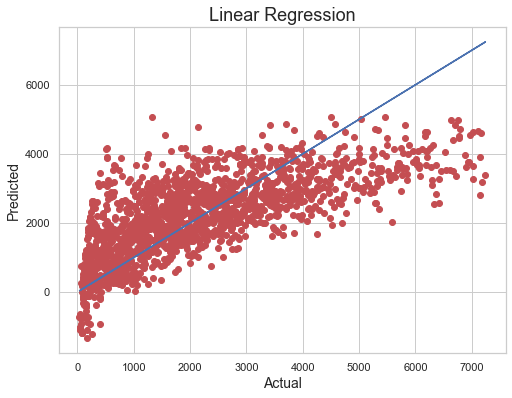

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [103]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))
print("r2_score is",r2_score(y_test,pred_test)*100)

mean absolute error 864.5815767935353
mean squared error 1268417.8543287101
Root mean squared error 1126.240584568284
r2_score is 51.025088351864056


Lasso regression

parameter tuning

In [107]:
#perform gridsearchcv and cross val score on lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 1, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [108]:
ls=Lasso(alpha=1,random_state=0,fit_intercept= True, normalize= False,tol= 0.001)
ls.fit(x_train,y_train)
pred_test_ls=ls.predict(x_test)
pred_train_ls=ls.predict(x_train)
ls_score = ls.score(x_train,y_train)
ls_acc_score=r2_score(y_test,pred_test_ls)
print("Accuracy score is:",ls_acc_score*100)


Accuracy score is: 51.06998469490497


In [109]:
#checks cv score
for u in range(2,10):
    cv_score_ls=cross_val_score(ls,x,y,cv=5)
    cv_mean_ls=cv_score_ls.mean()
    print("At cv :-",j )
    print("cv_score is:",cv_mean_ls*100)
    print("accuracy score---r2_score is",ls_acc_score*100)

At cv :- 9
cv_score is: 51.56337498414637
accuracy score---r2_score is 51.06998469490497
At cv :- 9
cv_score is: 51.56337498414637
accuracy score---r2_score is 51.06998469490497
At cv :- 9
cv_score is: 51.56337498414637
accuracy score---r2_score is 51.06998469490497
At cv :- 9
cv_score is: 51.56337498414637
accuracy score---r2_score is 51.06998469490497
At cv :- 9
cv_score is: 51.56337498414637
accuracy score---r2_score is 51.06998469490497
At cv :- 9
cv_score is: 51.56337498414637
accuracy score---r2_score is 51.06998469490497
At cv :- 9
cv_score is: 51.56337498414637
accuracy score---r2_score is 51.06998469490497
At cv :- 9
cv_score is: 51.56337498414637
accuracy score---r2_score is 51.06998469490497


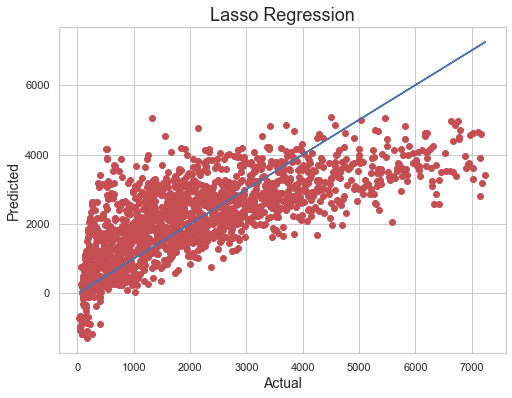

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

thus the Lasso regression performs well here.all data points are near to best fit line

In [111]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_ls))
print("mean squared error",mean_squared_error(y_test,pred_test_ls))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_ls)))
print("r2_score is",r2_score(y_test,pred_test_ls)*100)

mean absolute error 864.0170210067012
mean squared error 1267255.0687066286
Root mean squared error 1125.7242418579376
r2_score is 51.06998469490497


RandomForestRegressor

parameter tuning

In [114]:
#perform gridsearchcv and cross val score on RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['friedman_mse','mae'],'max_features':["auto","sqrt","log2"],'bootstrap': [True, False],'min_samples_split':[1,2],'min_samples_leaf':[1,2]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                                                      


{'bootstrap': True, 'criterion': 'mae', 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [115]:
rf=RandomForestRegressor(criterion="mae",max_features="log2",bootstrap= True,min_samples_leaf= 2, min_samples_split= 2)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 51.025088351864056
score of model is: 81.9644541501776


In [116]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 56.69305719946851


In [117]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rf))
print("mean squared error",mean_squared_error(y_test,pred_test_rf))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("r2_score is",r2_score(y_test,pred_test_rf)*100)

mean absolute error 757.7723538896222
mean squared error 1112202.3387818509
Root mean squared error 1054.6100410966371
r2_score is 57.05672930193914


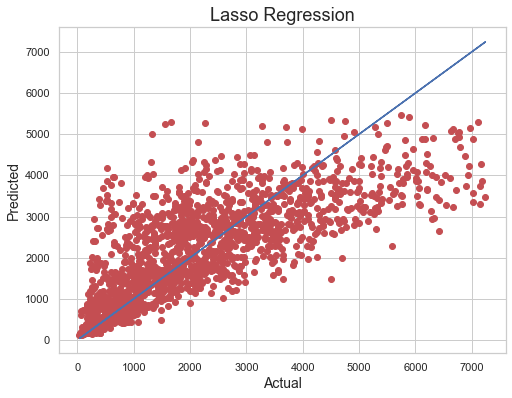

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

Ridge Regressor

In [119]:
#perform gridsearchcv and cross val score on Ridge Regressor
from sklearn.linear_model import Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.001, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [120]:
rd=Ridge(alpha=0.001,fit_intercept=True,normalize=True,random_state=0,tol=0.001)
rd.fit(x_train,y_train)
pred_test_rd=rd.predict(x_test)
pred_train_rd=rd.predict(x_train)
rd_score = rd.score(x_train,y_train)
rd_acc_score=r2_score(y_test,pred_test_rd)
print("Accuracy score is:",rd_acc_score*100)
print("score of model is:",rd_score*100)

Accuracy score is: 51.03533973823377
score of model is: 51.90999678886755


In [121]:
cv_score_rd=cross_val_score(rd,x,y,cv=5)
cv_mean_rd=cv_score_rd.mean()
print("cv_mean is:",cv_mean_rd*100)

cv_mean is: 51.55211731588937


In [122]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rd))
print("mean squared error",mean_squared_error(y_test,pred_test_rd))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rd)))
print("r2_score is",r2_score(y_test,pred_test_rd)*100)

mean absolute error 864.4577266842772
mean squared error 1268152.3501947485
Root mean squared error 1126.1227065443395
r2_score is 51.03533973823377


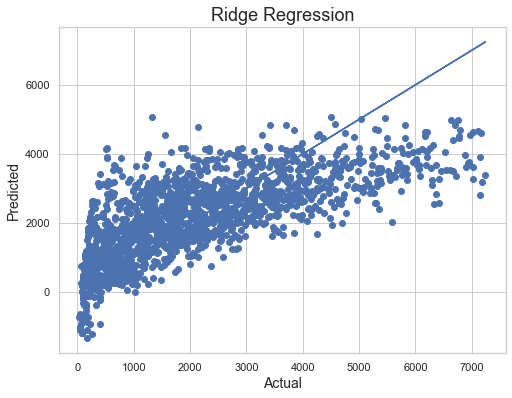

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rd,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

thus the Ridge regression performs well here.all data points are near to best fit line

Decison Tree Regressor

In [124]:
#perform gridsearchcv and cross val score on Decison Tree Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                  

{'criterion': 'mse', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'random_state': 1, 'splitter': 'random'}


In [125]:
dt=DecisionTreeRegressor(criterion='mse',max_features= 'auto', min_weight_fraction_leaf= 0.1, random_state= 1, splitter= 'random')
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=r2_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)


Accuracy score is: 49.125422780672544
score of model is: 50.98224293322768


In [126]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 50.54045154531097


In [127]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_dt))
print("mean squared error",mean_squared_error(y_test,pred_test_dt))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_dt)))
print("r2_score is",r2_score(y_test,pred_test_dt)*100)

mean absolute error 840.7153585349507
mean squared error 1317617.9375277283
Root mean squared error 1147.8754015692332
r2_score is 49.125422780672544


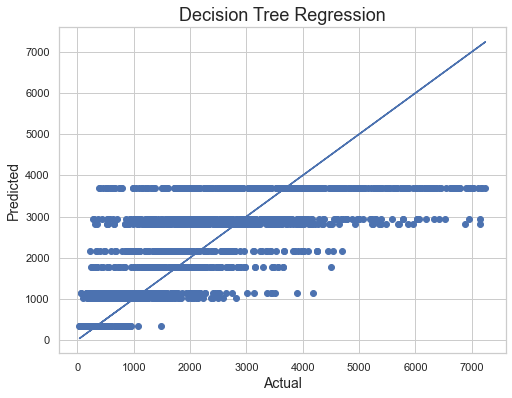

In [128]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_dt,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

thus the Decision Tree regression performs well here.all data points are near to best fit line

GradientBoostingRegressor

In [130]:
#perform gridsearchcv and cross val score on  GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100],'criterion':['friedman_mse','mse'],'learning_rate':[0.05],'max_depth' : [1,3,5,7,9,11,12],'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 5, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100}


In [132]:

gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=100,learning_rate= 0.05,max_depth= 5, min_weight_fraction_leaf= 0.1)
gbr.fit(x_train,y_train)
pred_test_gbr=gbr.predict(x_test)
pred_train_gbr=gbr.predict(x_train)
gbr_score = gbr.score(x_train,y_train)
gbr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",gbr_acc_score*100)
print("score of model is:",gbr_score*100)

Accuracy score is: 51.025088351864056
score of model is: 59.41669907419267


In [133]:
cv_score_gbr=cross_val_score(gbr,x,y,cv=5)
cv_mean_gbr=cv_score_gbr.mean()
print("cv_mean is:",cv_mean_gbr*100)

cv_mean is: 58.16632756037132


In [134]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_gbr))
print("mean squared error",mean_squared_error(y_test,pred_test_gbr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_gbr)))
print("r2_score is",r2_score(y_test,pred_test_gbr)*100)

mean absolute error 746.3780295764934
mean squared error 1076588.6934617544
Root mean squared error 1037.5879208345452
r2_score is 58.43180860019048


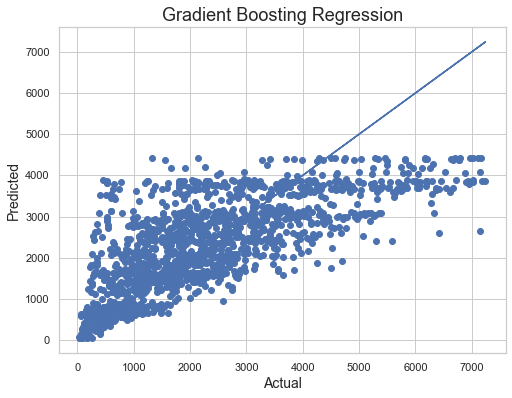

In [135]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_gbr,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

Support Vector Regressor

In [137]:
#perform gridsearchcv and cross val score on Support Vector Regressor
from sklearn.svm import SVR
parameters ={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale', 'auto'],'tol':[0.01,0.0001,0.001],'shrinking':[True,False],'degree':[3,4,5],'max_iter':[1,2,-1]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': False, 'tol': 0.0001}


In [139]:
sv=SVR(kernel='poly',gamma='scale',degree= 5, max_iter= -1, shrinking= False, tol= 0.0001)
sv.fit(x_train,y_train)
pred_test_sv=sv.predict(x_test)
pred_train_sv=sv.predict(x_train)
sv_score = sv.score(x_train,y_train)
sv_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",sv_acc_score*100)
print("score of model is:",sv_score*100)

Accuracy score is: 51.025088351864056
score of model is: 55.52793300165468


In [140]:
cv_score_sv=cross_val_score(sv,x,y,cv=5)
cv_mean_sv=cv_score_sv.mean()
print("cv_mean is:",cv_mean_sv*100)

cv_mean is: 53.96187289941565


In [141]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_sv))
print("mean squared error",mean_squared_error(y_test,pred_test_sv))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_sv)))
print("r2_score is",r2_score(y_test,pred_test_sv)*100)

mean absolute error 766.2153641016457
mean squared error 1146468.8464142026
Root mean squared error 1070.7328548308408
r2_score is 55.73366436867806


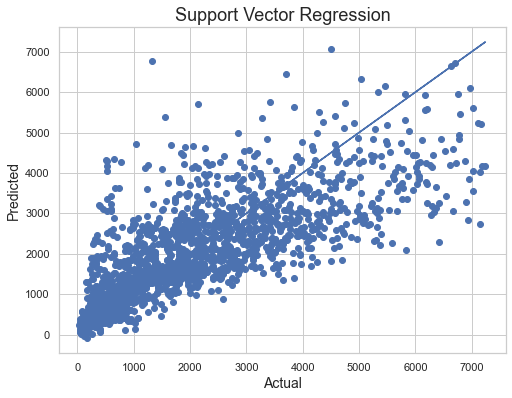

In [142]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_sv,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

thus the Support Vector Regression performs well here.all data points are near to best fit line

#Elastic Net Regression(combination of L1 & L2)

In [148]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
enr=ElasticNet()
clf=GridSearchCV(enr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [157]:
enr=ElasticNet(alpha=0.0001,fit_intercept= True,normalize= False, random_state= 0, tol= 0.001)
enr.fit(x_train,y_train)
pred_test_enr=enr.predict(x_test)
pred_train_enr=enr.predict(x_train)
enr_score = enr.score(x_train,y_train)
enr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",enr_acc_score*100)
print("score of model is:",enr_score*100)

Accuracy score is: 51.025088351864056
score of model is: 51.9100797672286


In [158]:
cv_score_enr=cross_val_score(enr,x,y,cv=5)
cv_mean_enr=cv_score_enr.mean()
print("cv_mean is:",cv_mean_enr*100)

cv_mean is: 51.55197112313756


In [159]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_enr))
print("mean squared error",mean_squared_error(y_test,pred_test_enr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_enr)))
print("r2_score is",r2_score(y_test,pred_test_enr)*100)

mean absolute error 864.5040433455256
mean squared error 1268265.8390264835
Root mean squared error 1126.1730946113405
r2_score is 51.03095781827869


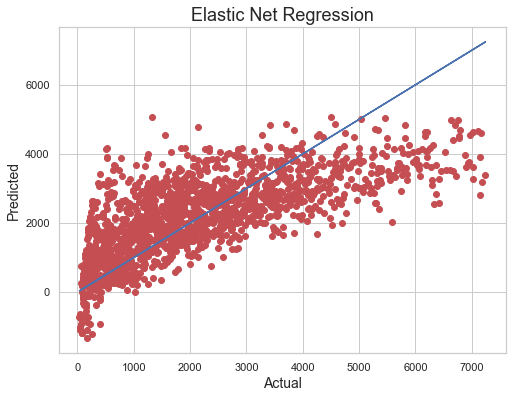

In [160]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_enr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Elastic Net Regression',fontsize=18)
plt.show()

conclusion 
output

In [183]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ls.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,753.0198,1279.423077
1,341.5554,219.420779
2,2659.8710,2807.061457
3,2460.7968,2290.585336
4,4753.8120,4606.293298
...,...,...
1662,1607.2412,987.660542
1663,1035.9848,3657.881439
1664,1917.5040,1477.166336
1665,3338.9870,2836.548135


we are used the train data for training the model and used the new unseen test data to predict the target sales

now predict target sales with new unseen test data

In [184]:
 pred_test_raw1=ls.predict(test_data)
    

since the test data does not has tagert column and we are only predicted that ,so now for to compare with actual result we can consider the mean of target column sales data as the referrence to compare with.

In [185]:
y=train_new['Item_Outlet_Sales'].mean()
y

2135.0343197840534

In [186]:
import numpy as np
#a=np.array(y_test)
predicted=np.array(ls.predict(test_data))
df_con=pd.DataFrame({"Predicted":predicted})
df_con


,Predicted
0,2061.761522
1,1288.998687
2,1854.254984
3,2315.634964
4,4705.675358
...,...
5676,2413.601677
5677,3008.364064
5678,1847.818183
5679,3098.279329


since if we compare predicted result of sales with the mean value of dataset.thus this model predicts well among other models.so we can save this model

In [187]:
import pickle
filename='happy.pkl'
pickle.dump(ls,open(filename,'wb'))


In [188]:
models=['Linear Regression','Lasso regression','RandomForestRegressor','Ridge Regressor','Decison Tree Regressor','GradientBoostingRegressor'
,'Support Vector Regressor','ElasticNet Regression']
        


In [189]:
scores=[ r2_score(y_test,pred_test)*100,ls_acc_score*100,rf_acc_score*100,rd_acc_score*100,dt_acc_score*100,gbr_acc_score*100,sv_acc_score*100,enr_acc_score*100]
scores

[51.025088351864056,
 51.06998469490497,
 51.025088351864056,
 51.03533973823377,
 49.125422780672544,
 51.025088351864056,
 51.025088351864056,
 51.025088351864056]

In [190]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8]

In [191]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.style.hide_index()


Nos,Model Names,Scores
1,Linear Regression,51.025088
2,Lasso regression,51.069985
3,RandomForestRegressor,51.025088
4,Ridge Regressor,51.035340
5,Decison Tree Regressor,49.125423
6,GradientBoostingRegressor,51.025088
7,Support Vector Regressor,51.025088
8,ElasticNet Regression,51.025088


From the above models,Lasso Regression performs the best.so it it the best model and we saved this model

The supermarket type 1 increases the overall sales.
The products like fruits and vegetables,snack foods increases the overall sales much than other consumables and households products